# 多元统计分析作业一（小组）

- 胡义磊 2020010801005
- 张逸斐 2020010801006
- 阮登科 2020010801008
- 蔡与望 2020010801024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts.charts import Map
import pyecharts.options as opts

plt.rc("font", family="simhei", size=12)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
region = pd.read_csv(
    "data/region.txt",
    sep="\t",
    names=["region_id", "region_name", "stock_id", "stock_name"],
    dtype=str,
)
region.region_name = [
    str(name).replace("板块", "").replace("内蒙", "内蒙古") for name in region.region_name
]
region_count = region.region_name.value_counts()

In [3]:
Map().add(
    "上市数目",
    list(zip(region_count.index, [int(value) for value in region_count.values])),
    is_map_symbol_show=False,
    is_roam=False,
).set_global_opts(
    title_opts=opts.TitleOpts("各地区上市数目"),
    visualmap_opts=opts.VisualMapOpts(
        min_=0,
        max_=650,
        range_text=["上市最多", "上市最少"],
        is_piecewise=True,
        pos_top="middle",
        pos_left="left",
        orient="vertical",
        split_number=13,
    ),
).render_notebook()


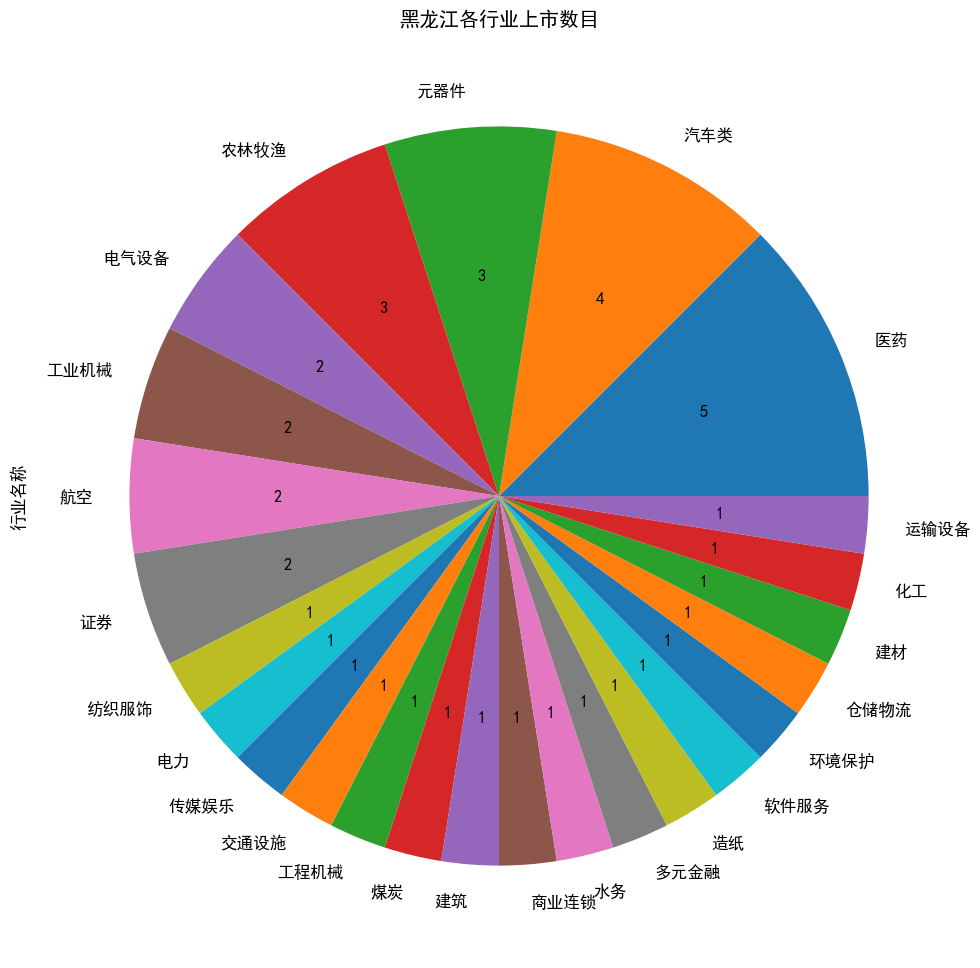

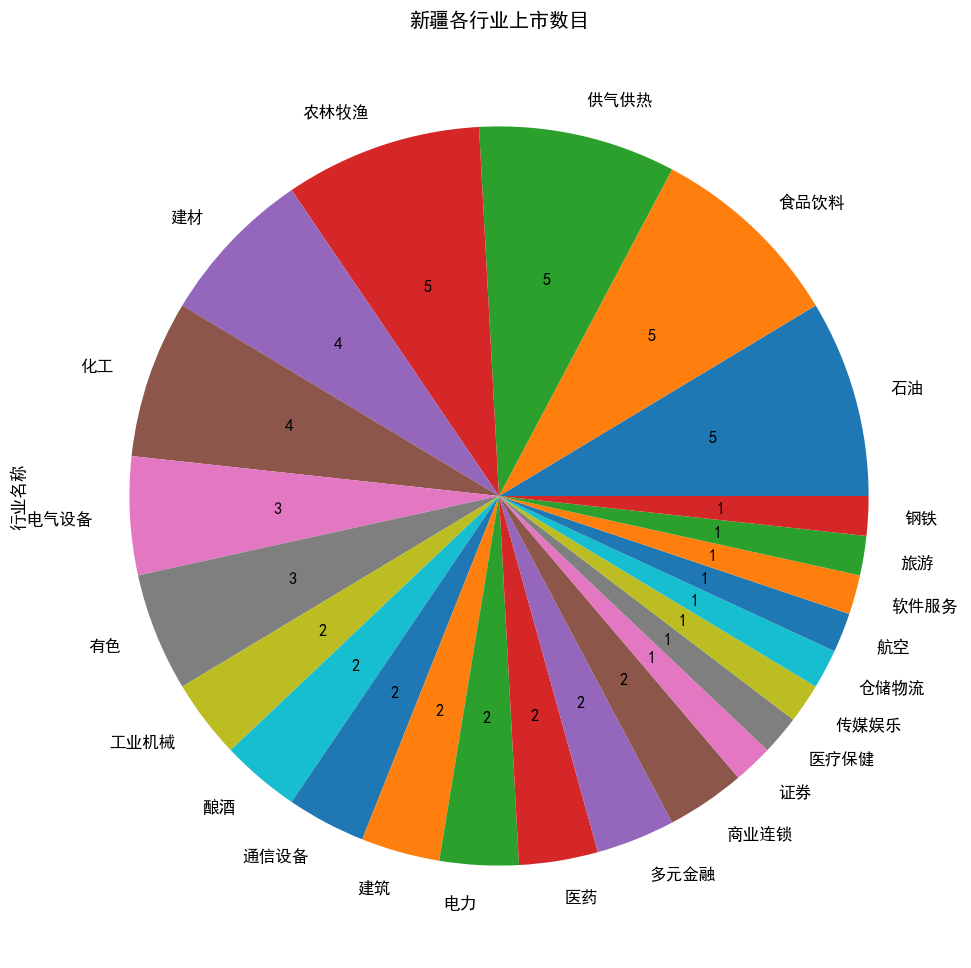

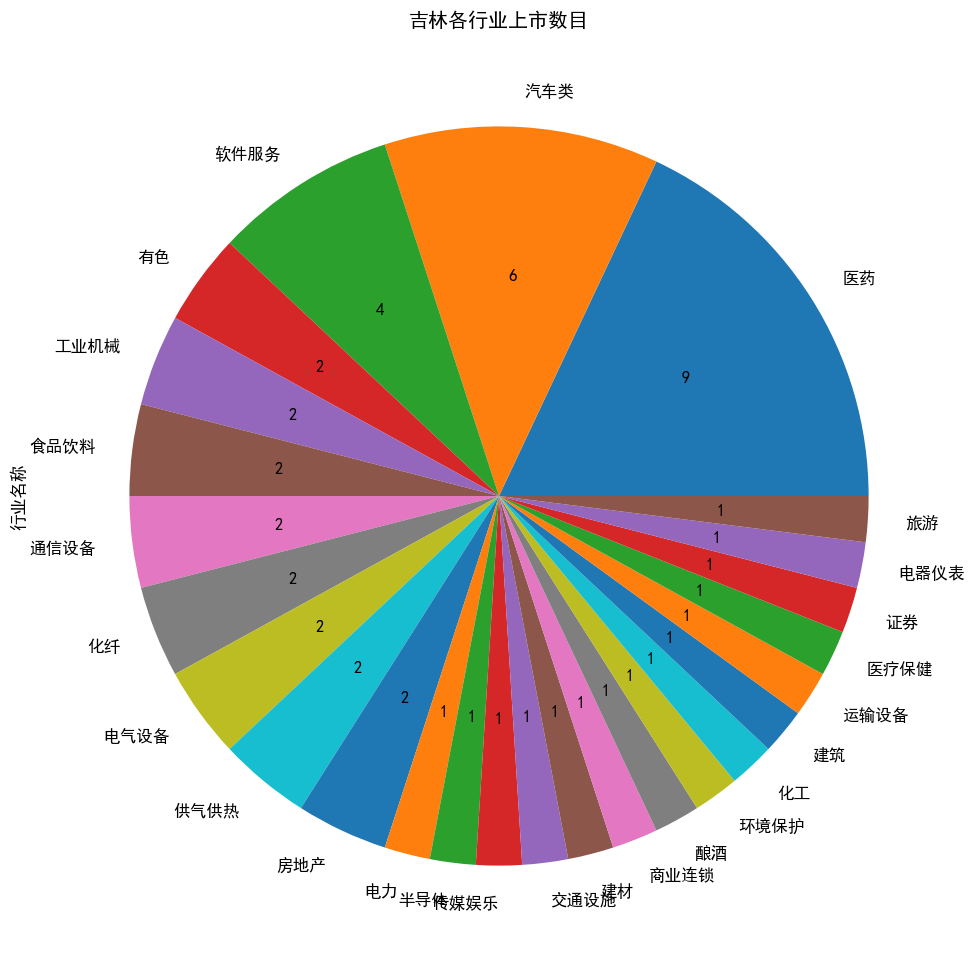

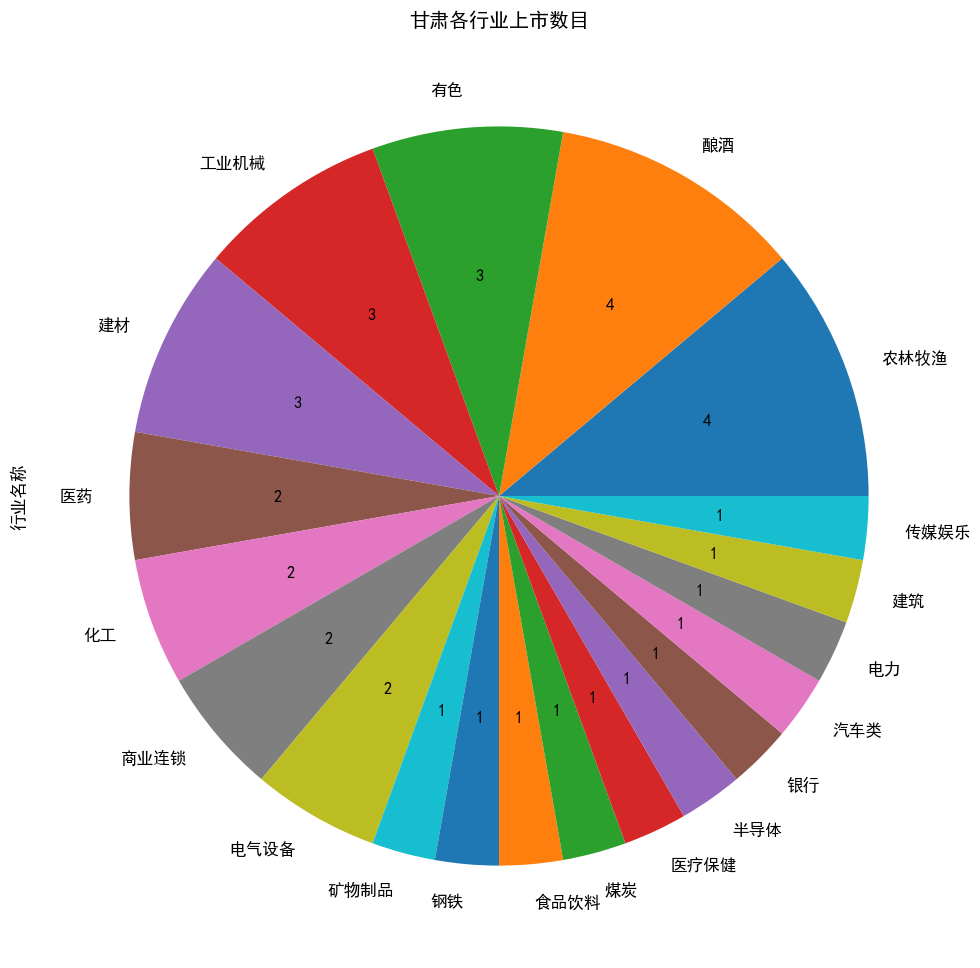

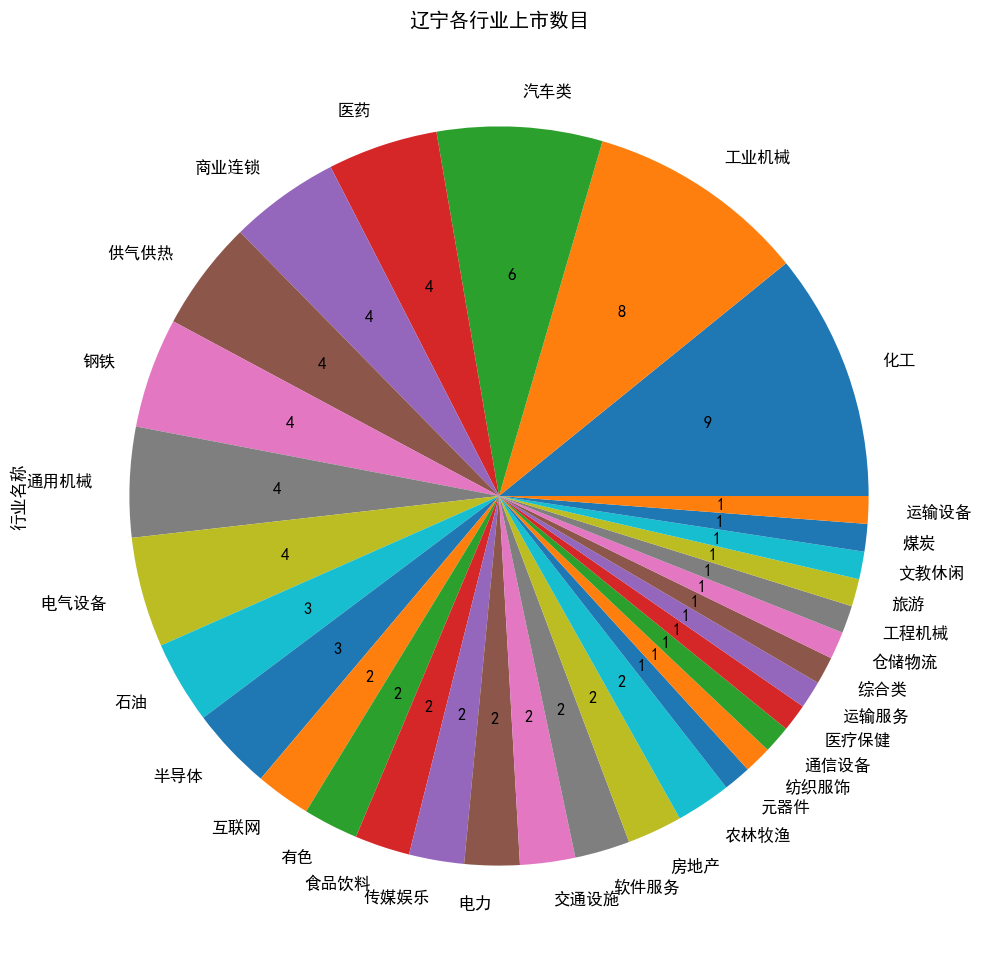

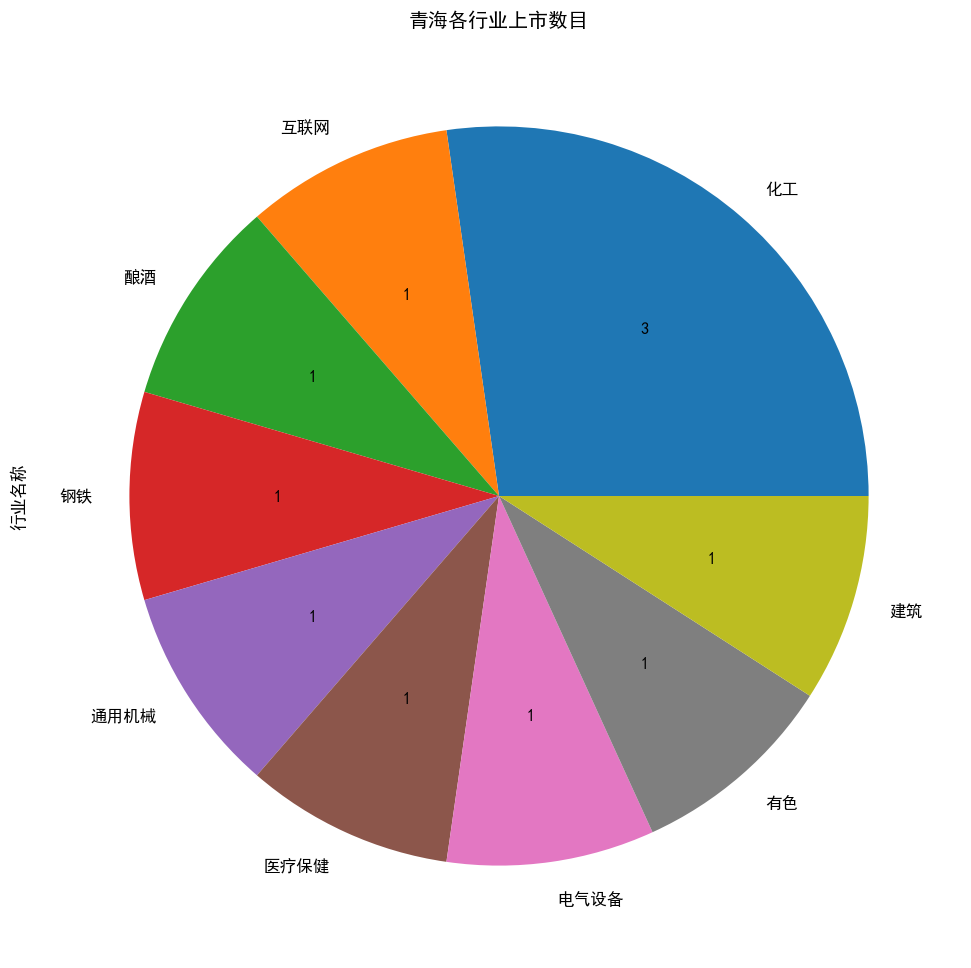

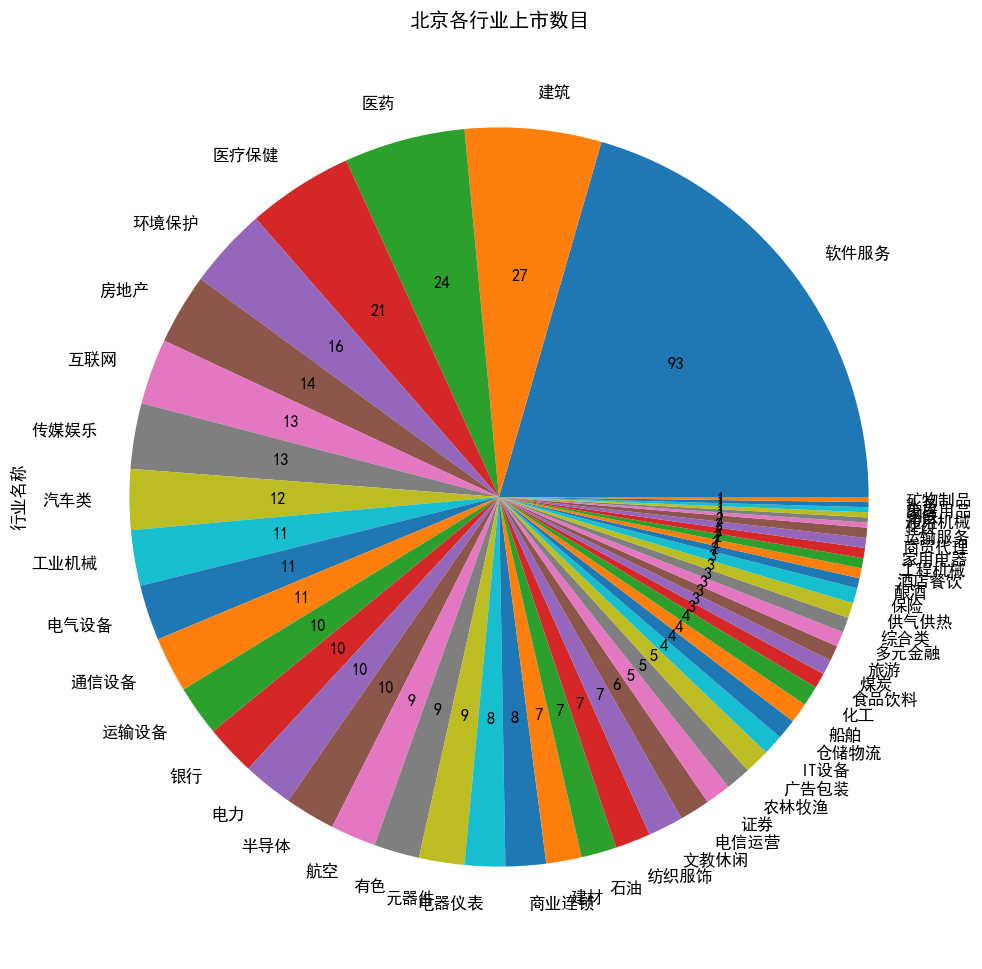

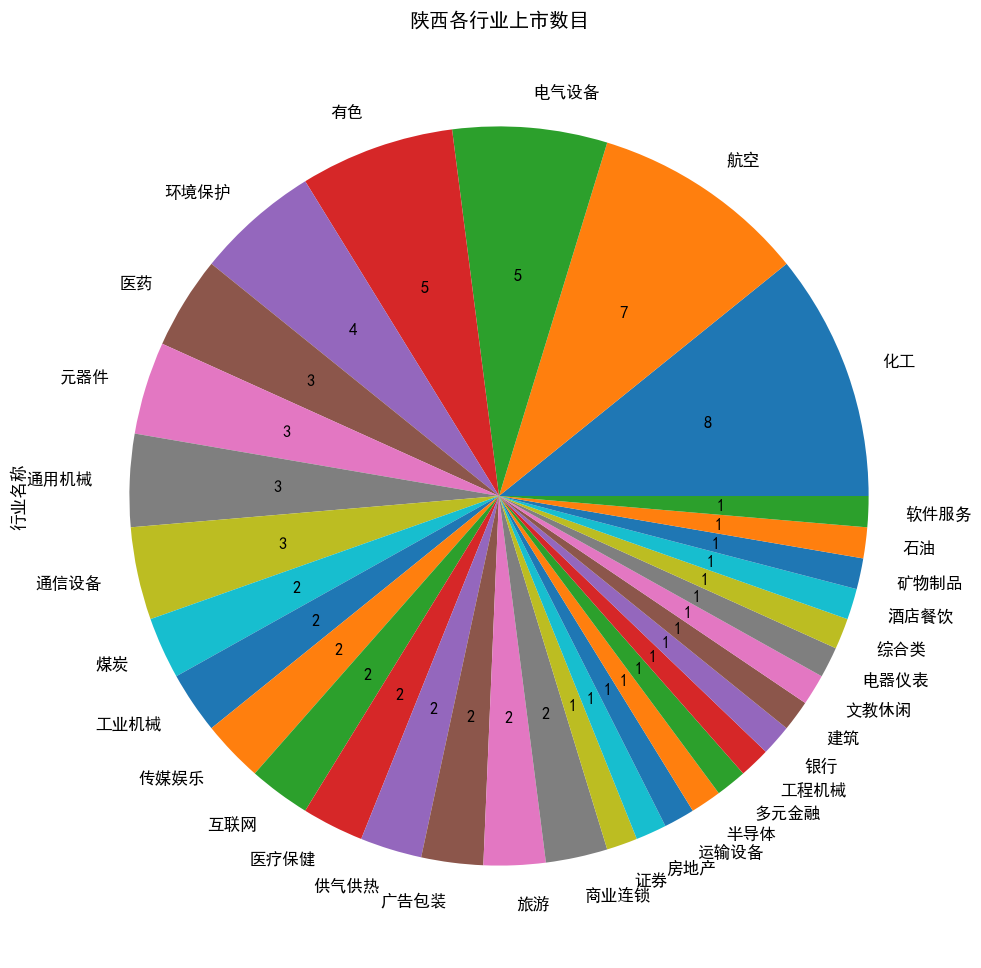

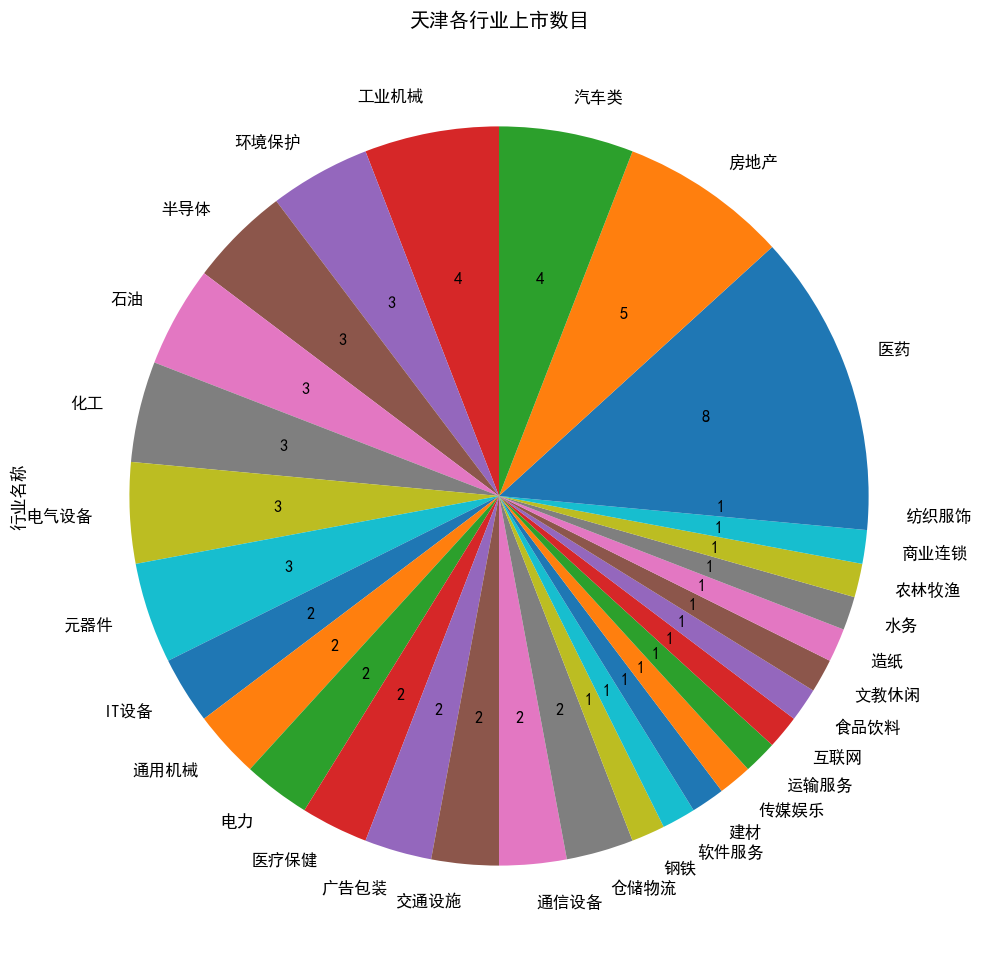

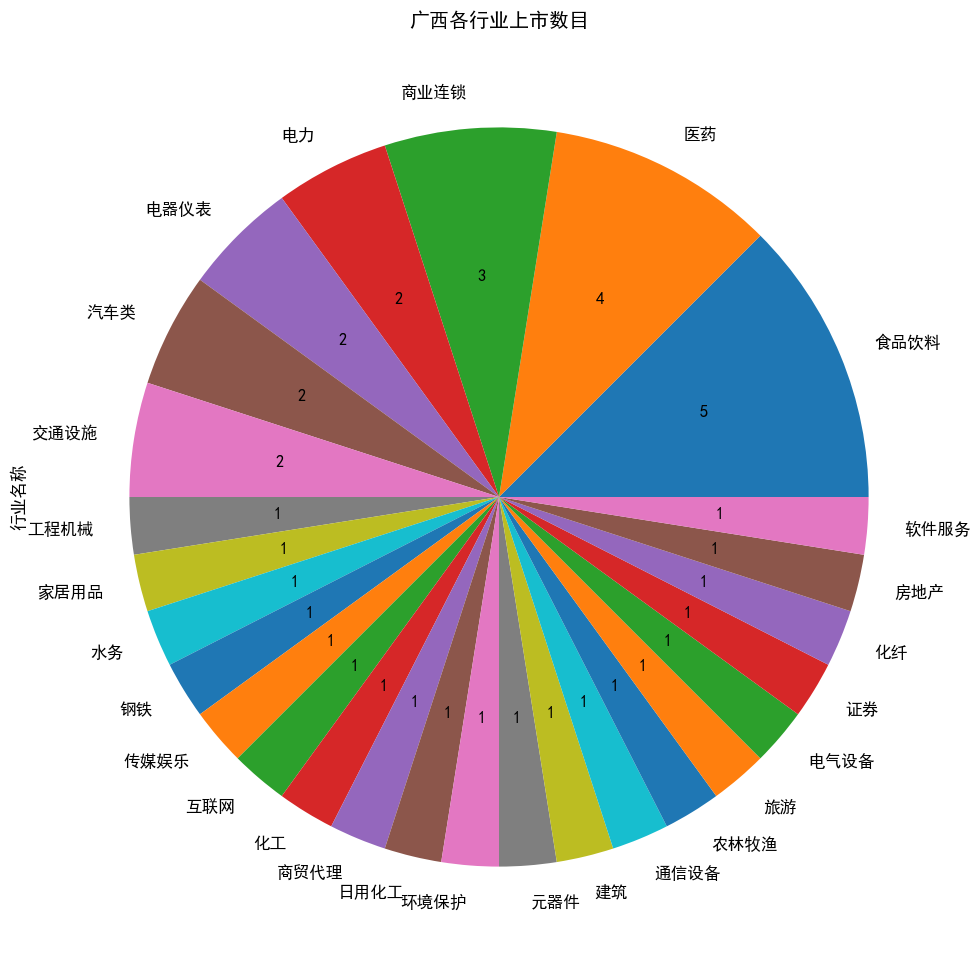

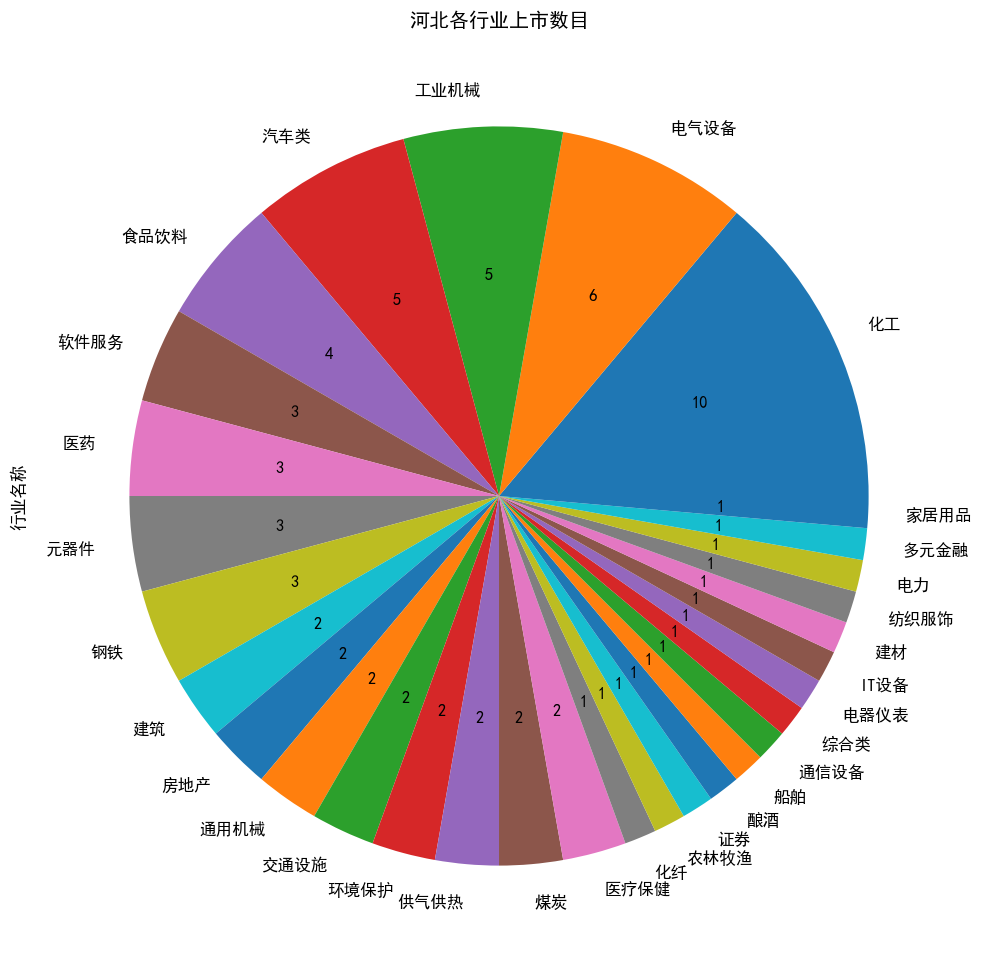

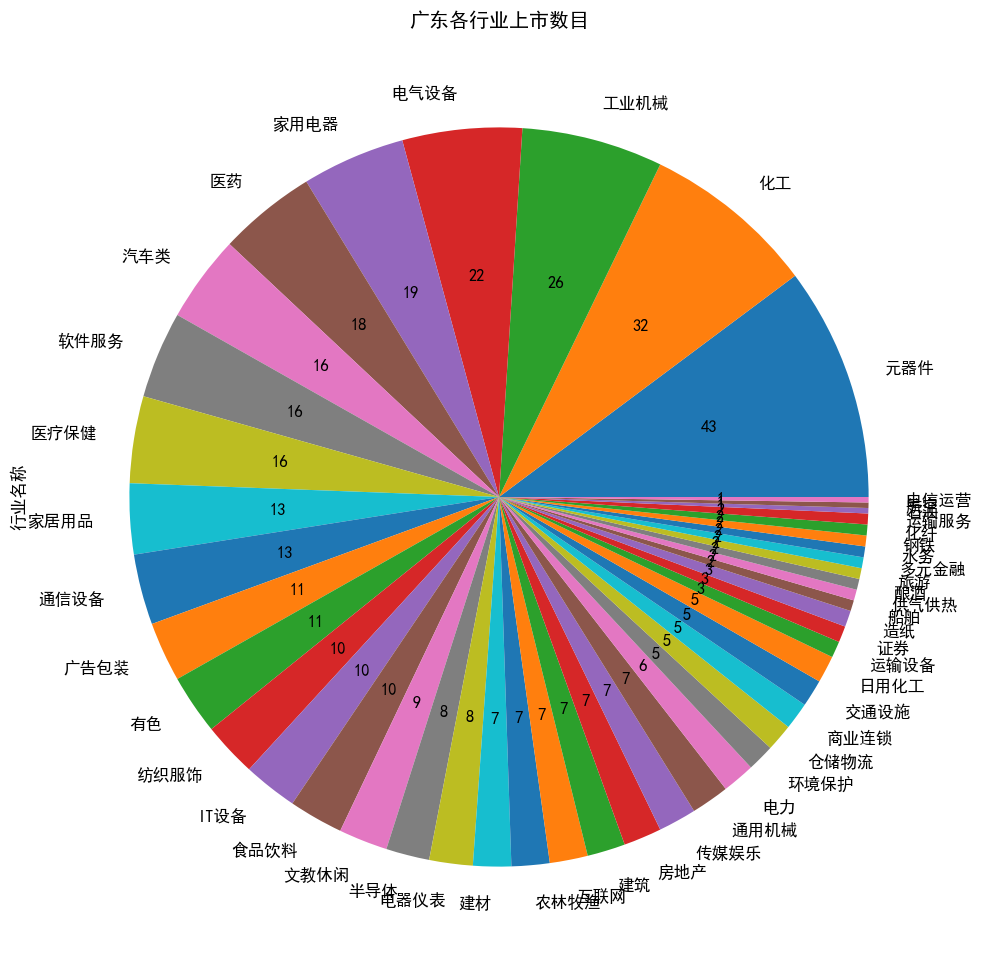

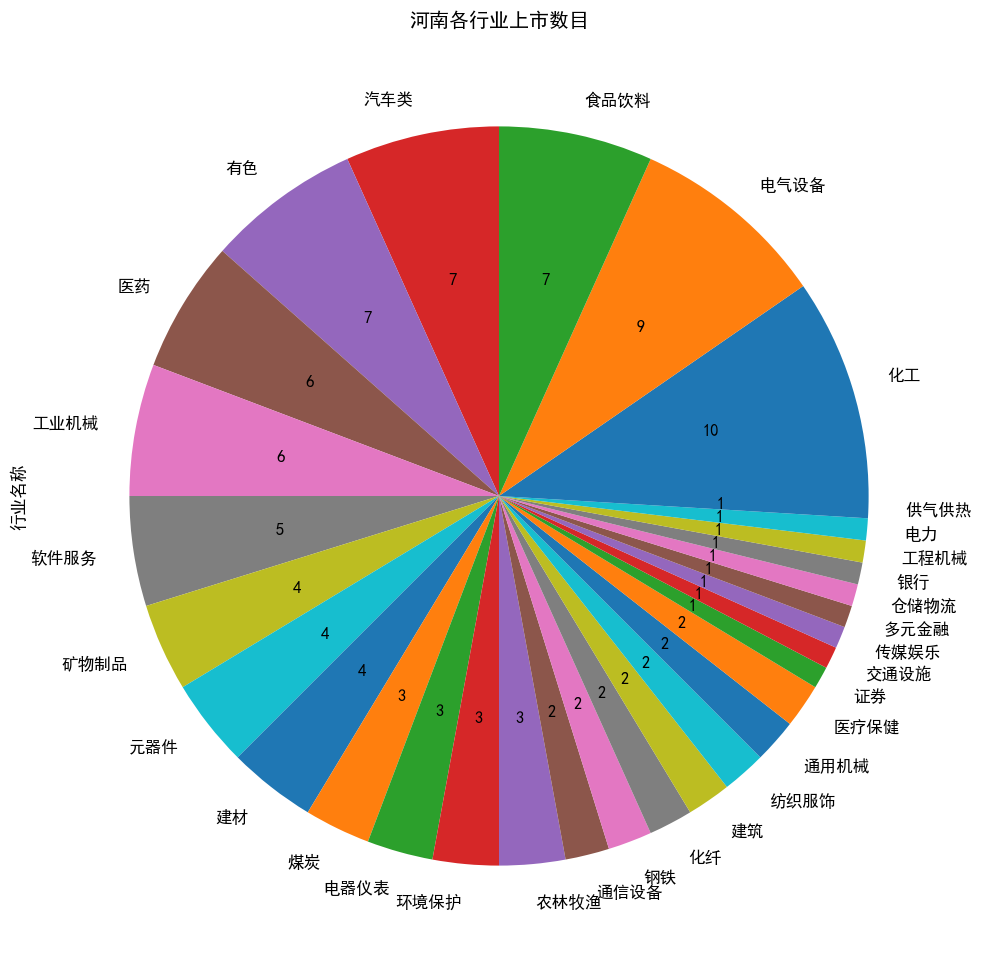

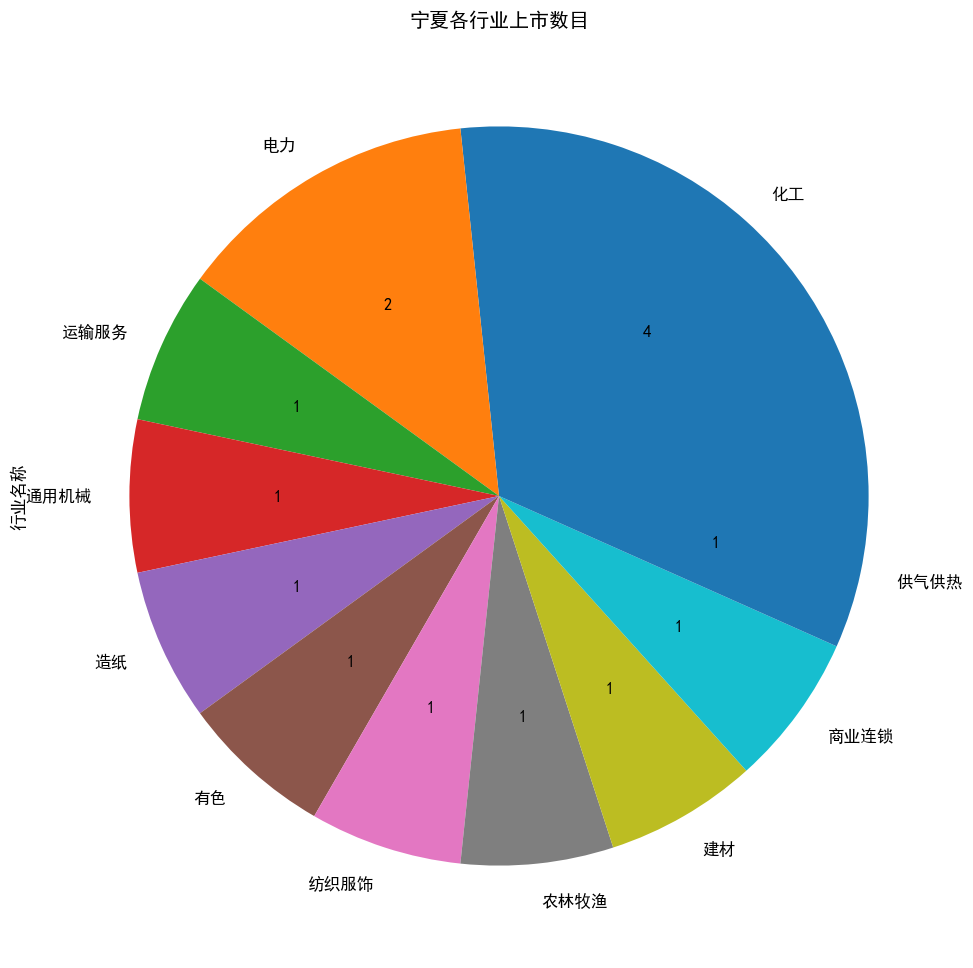

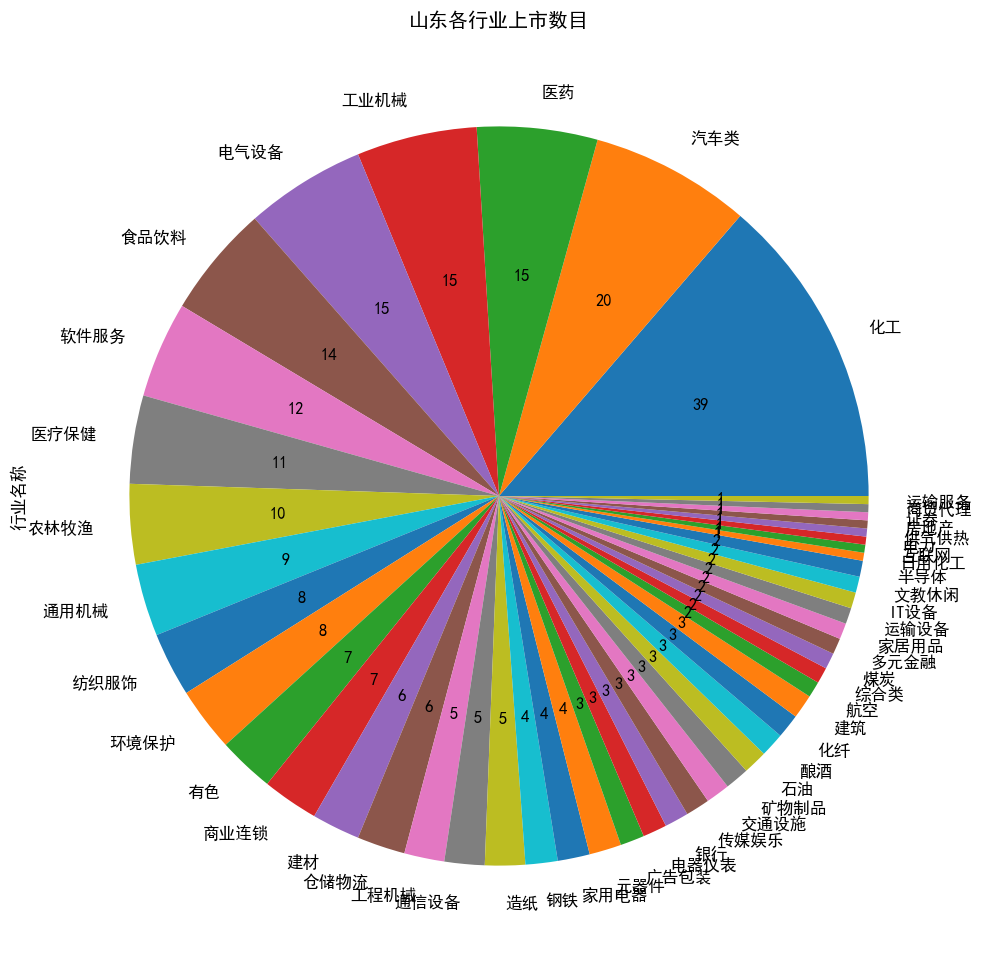

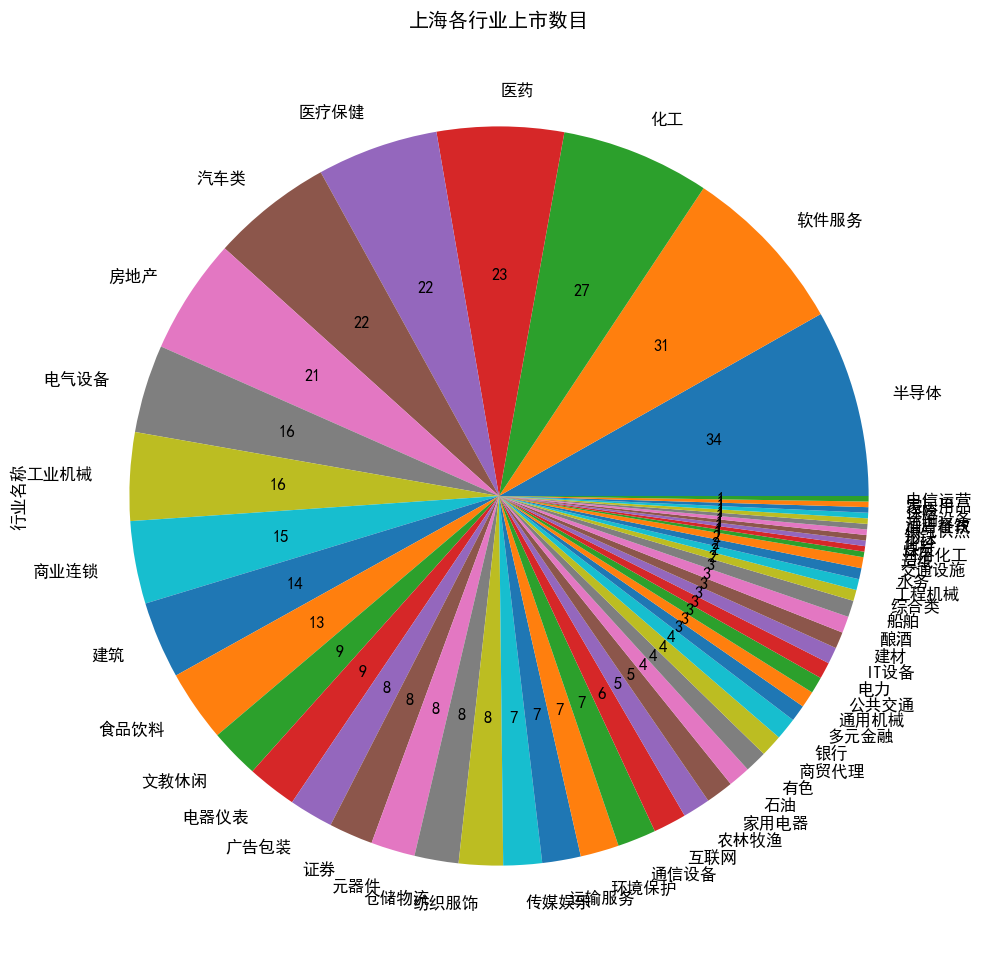

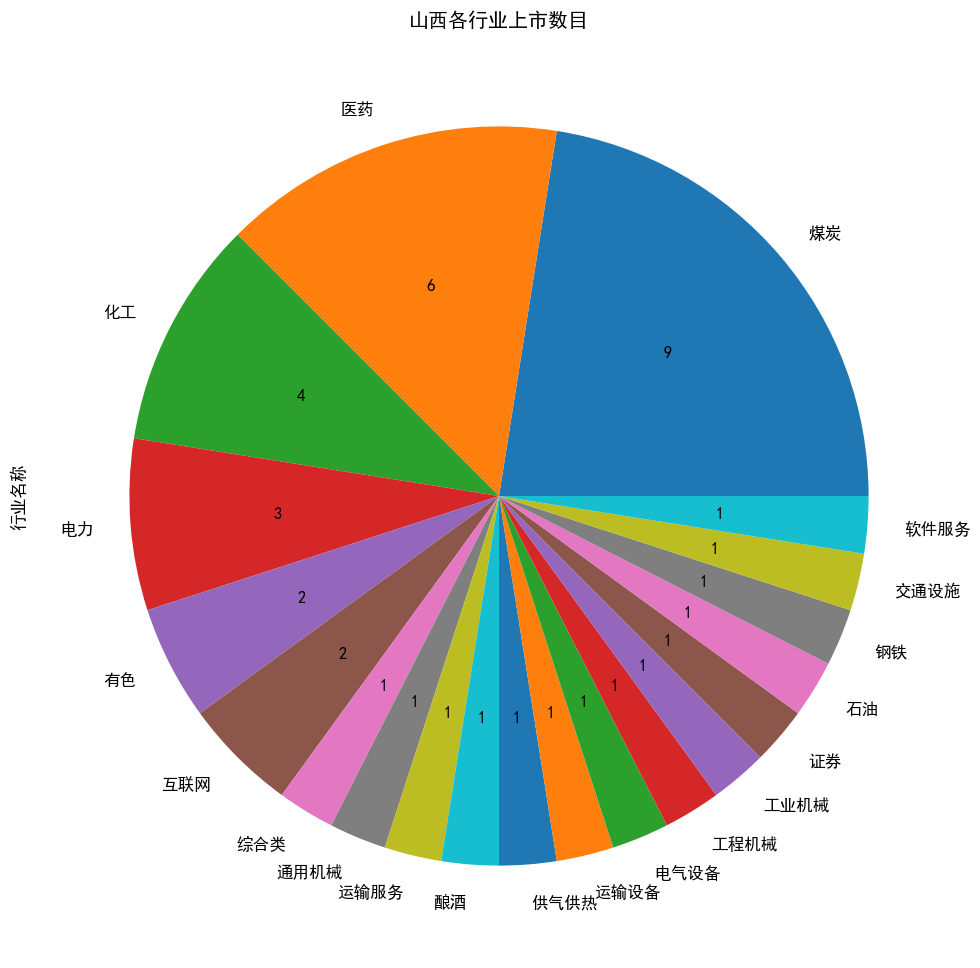

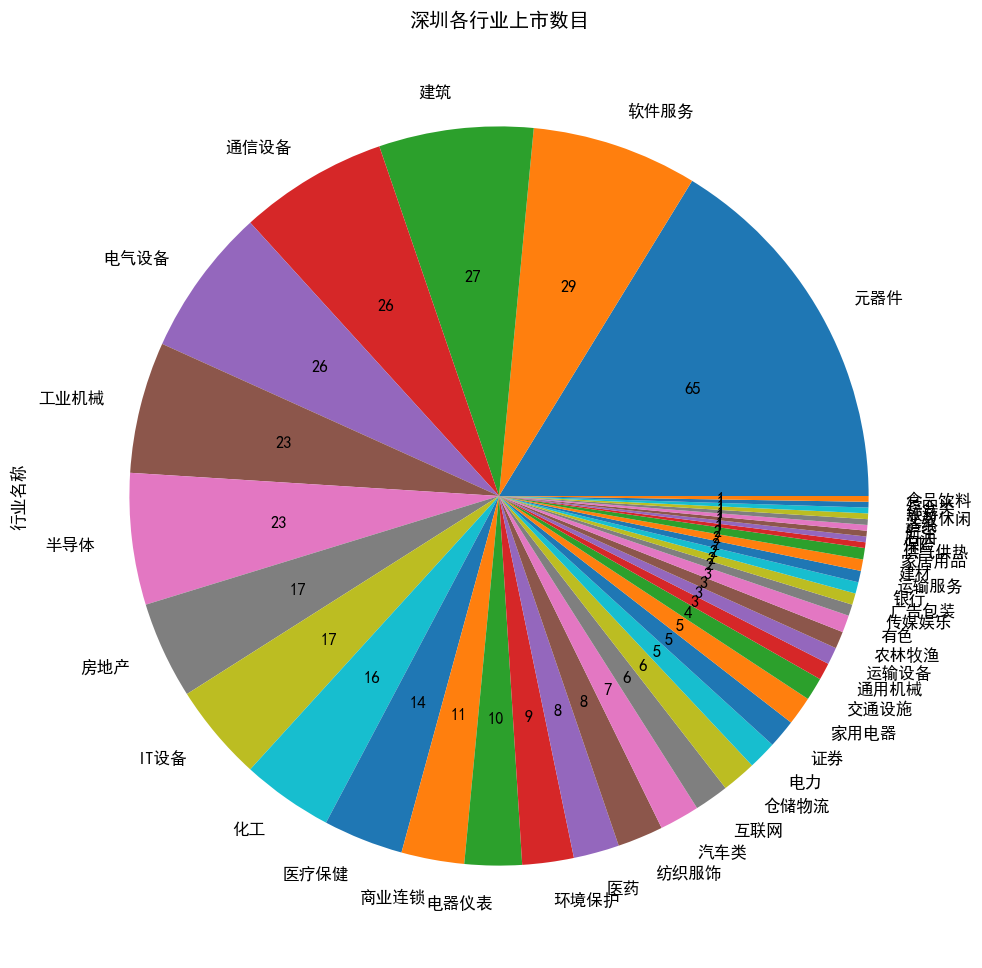

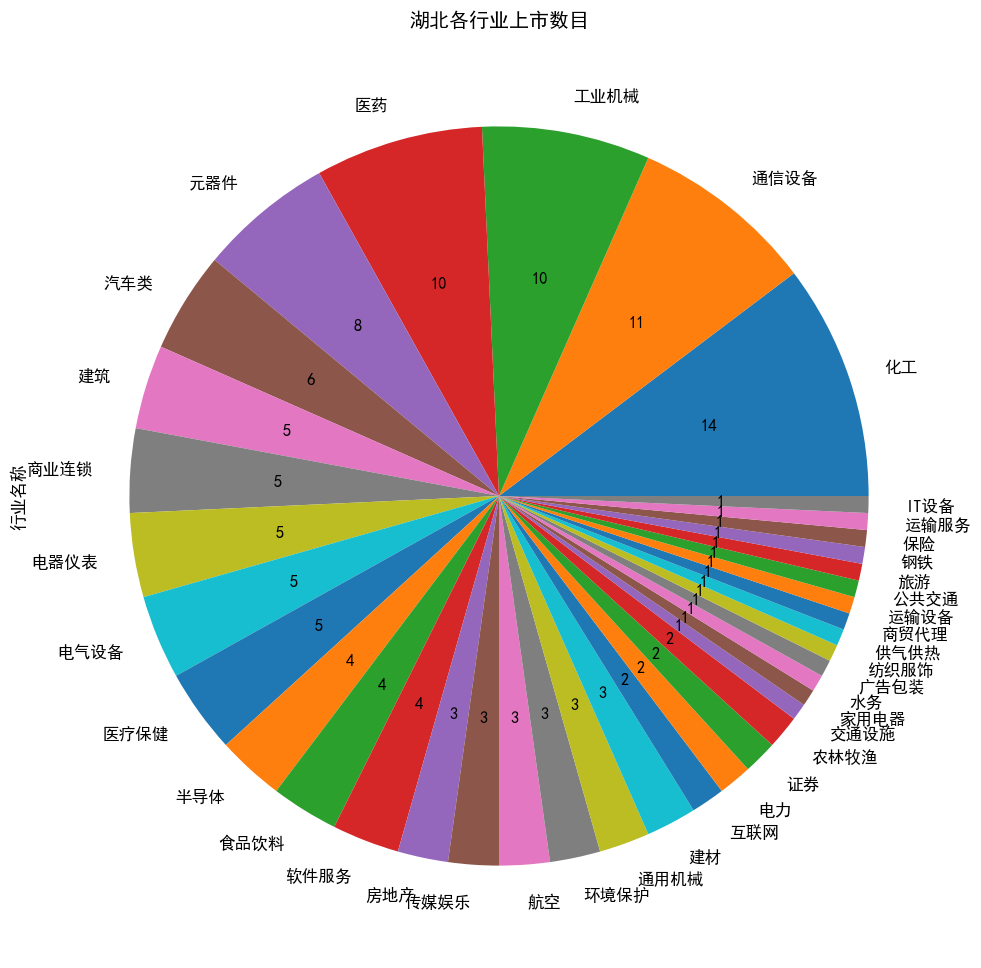

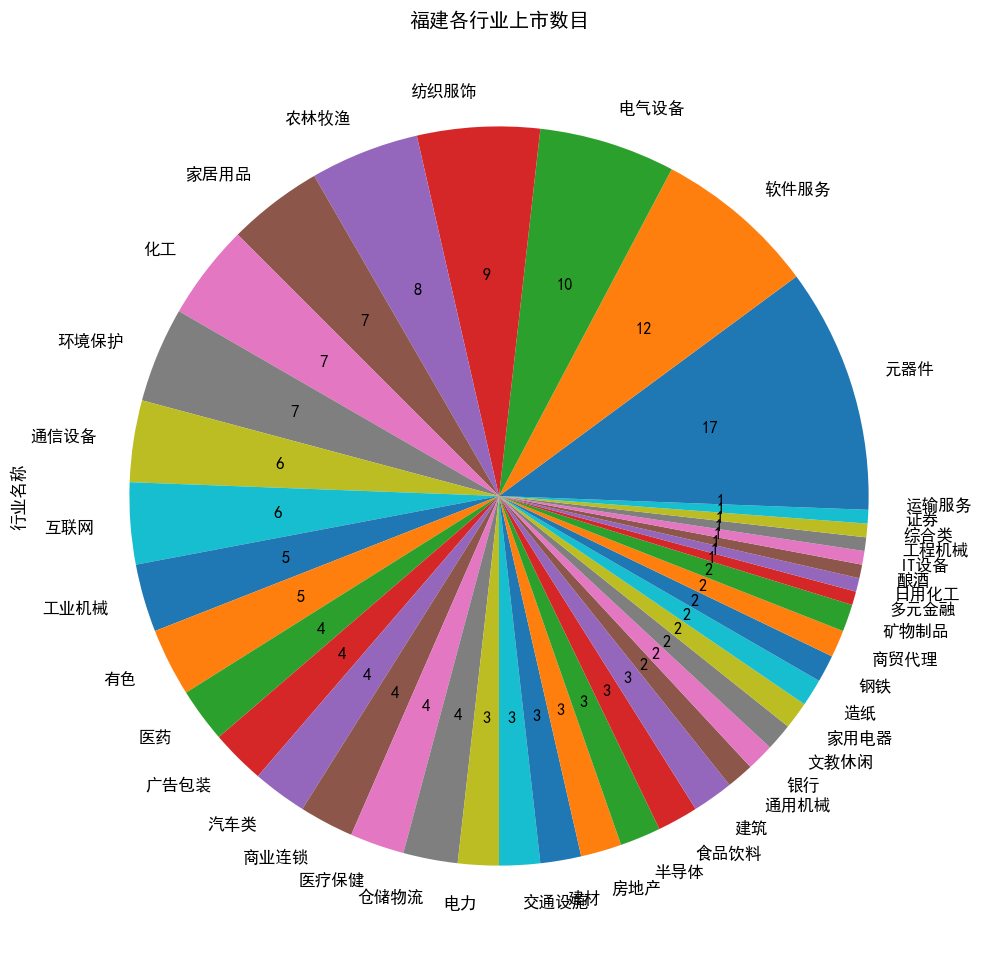

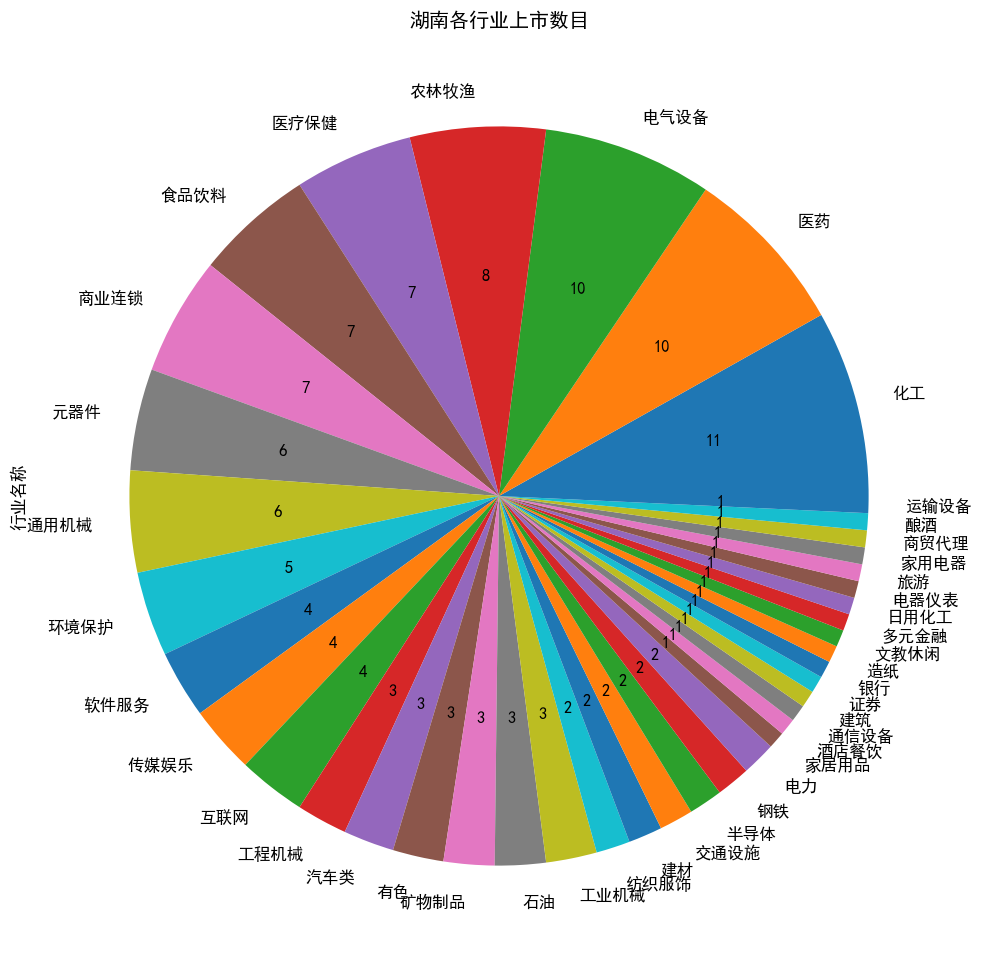

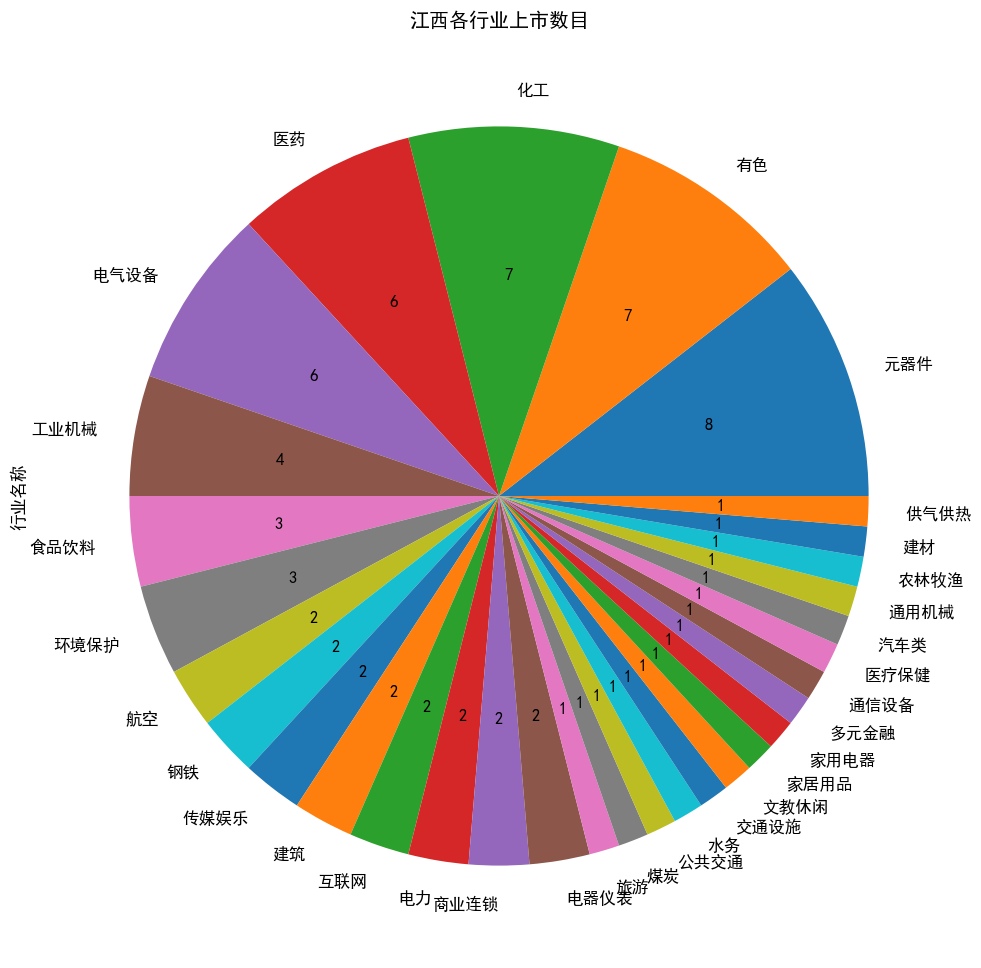

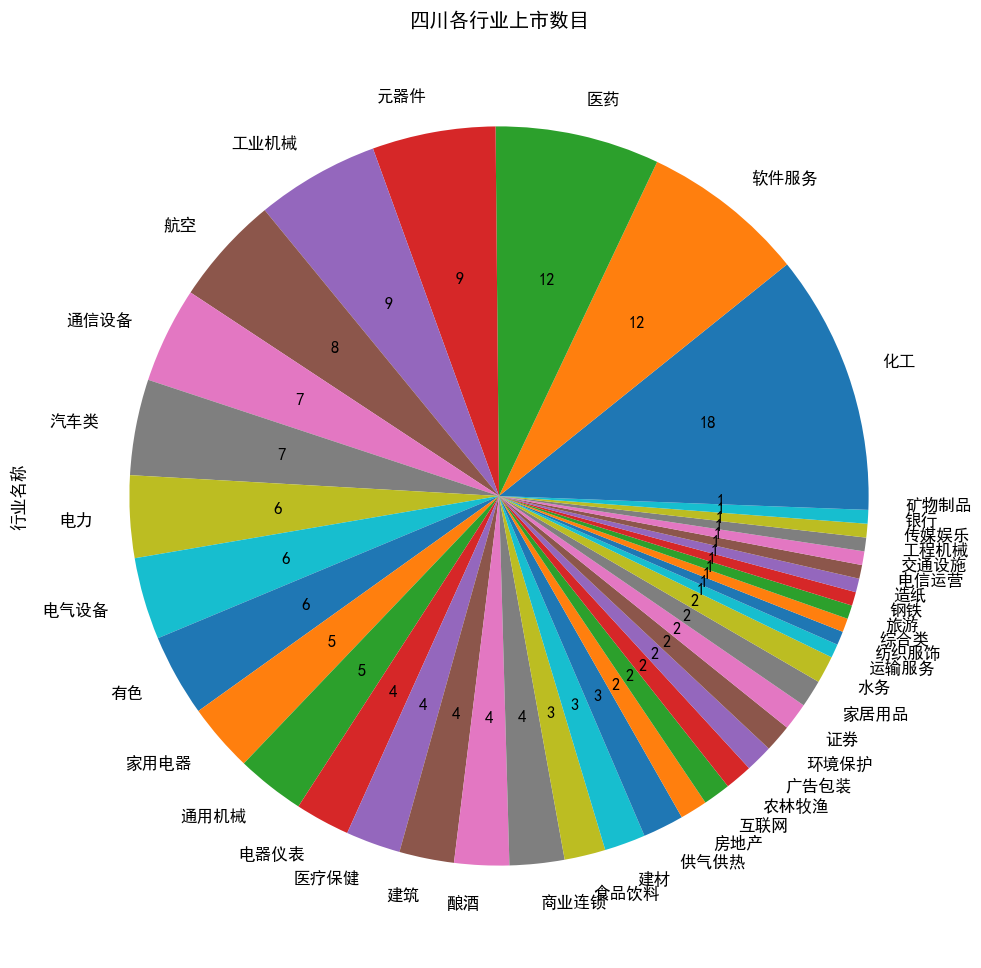

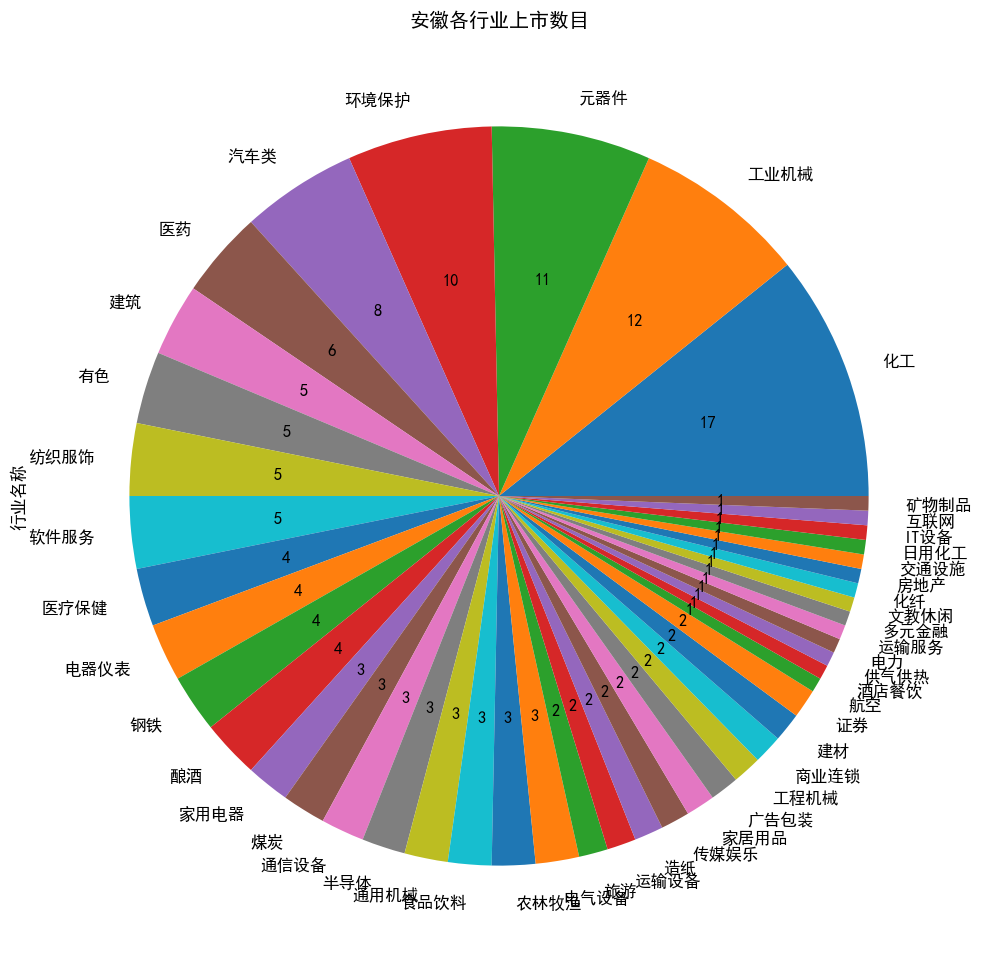

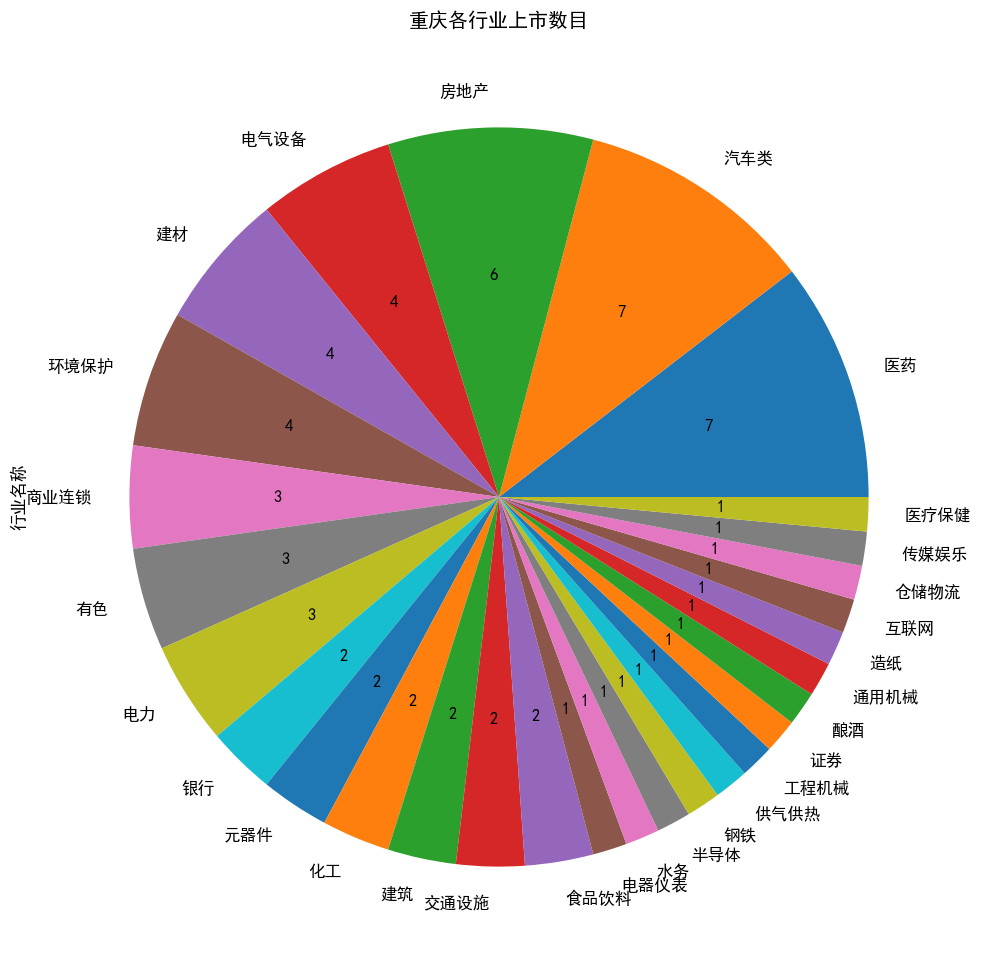

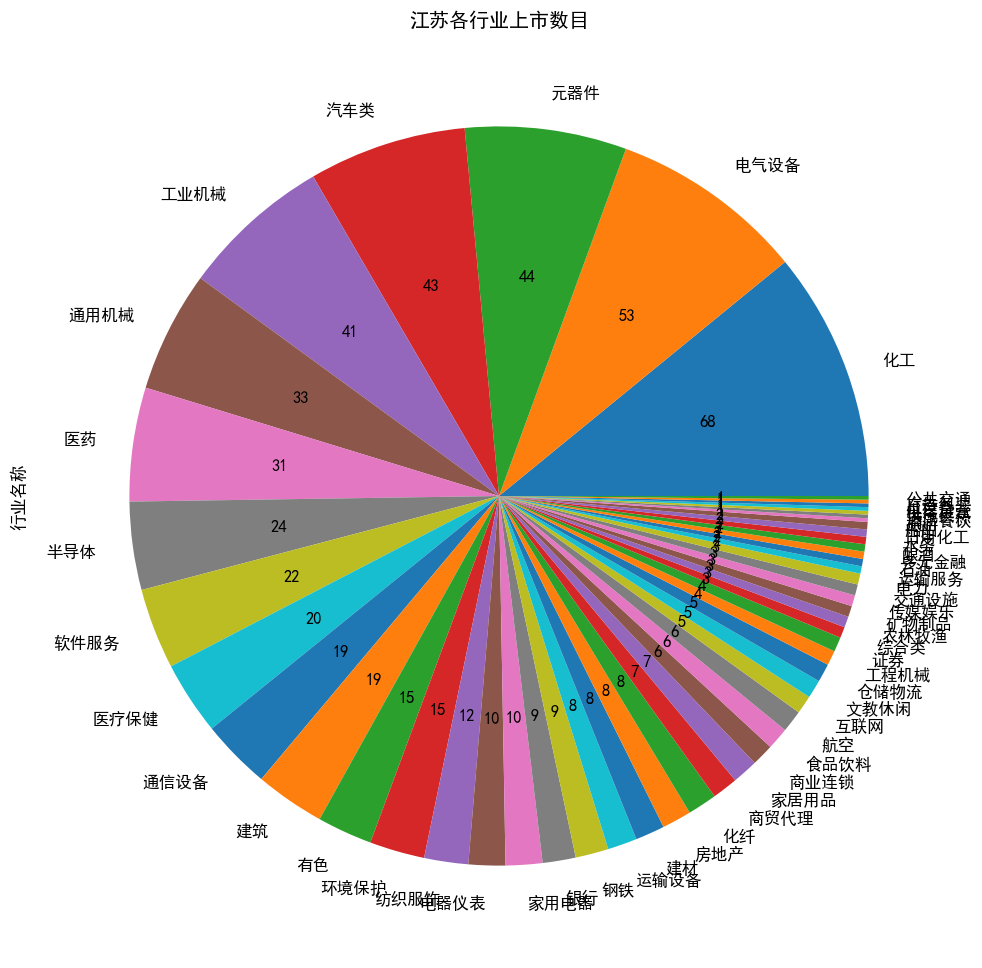

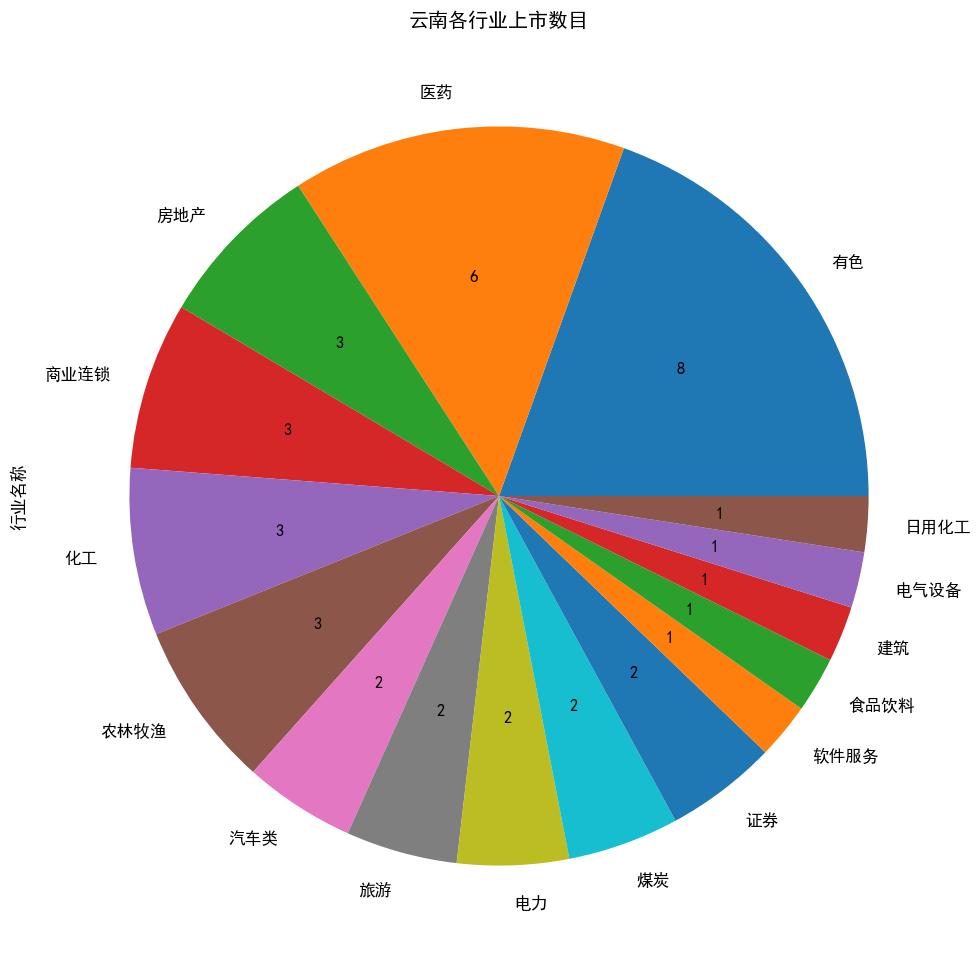

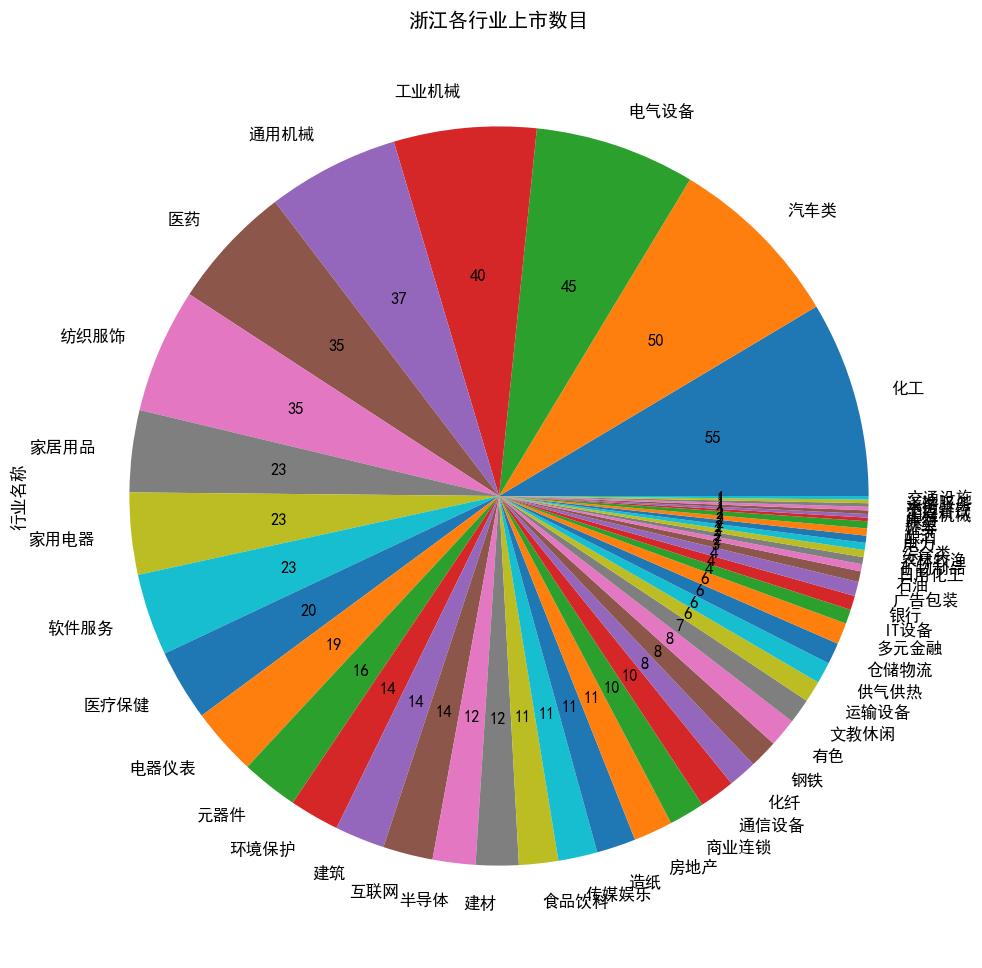

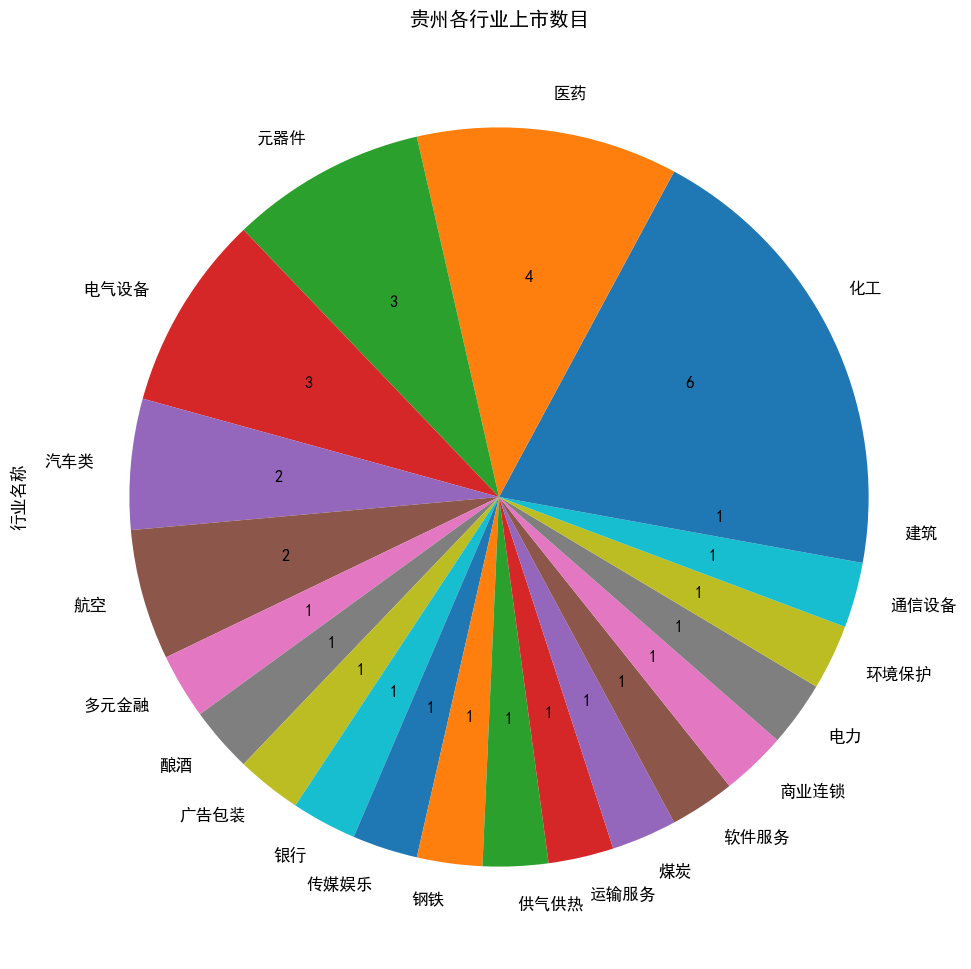

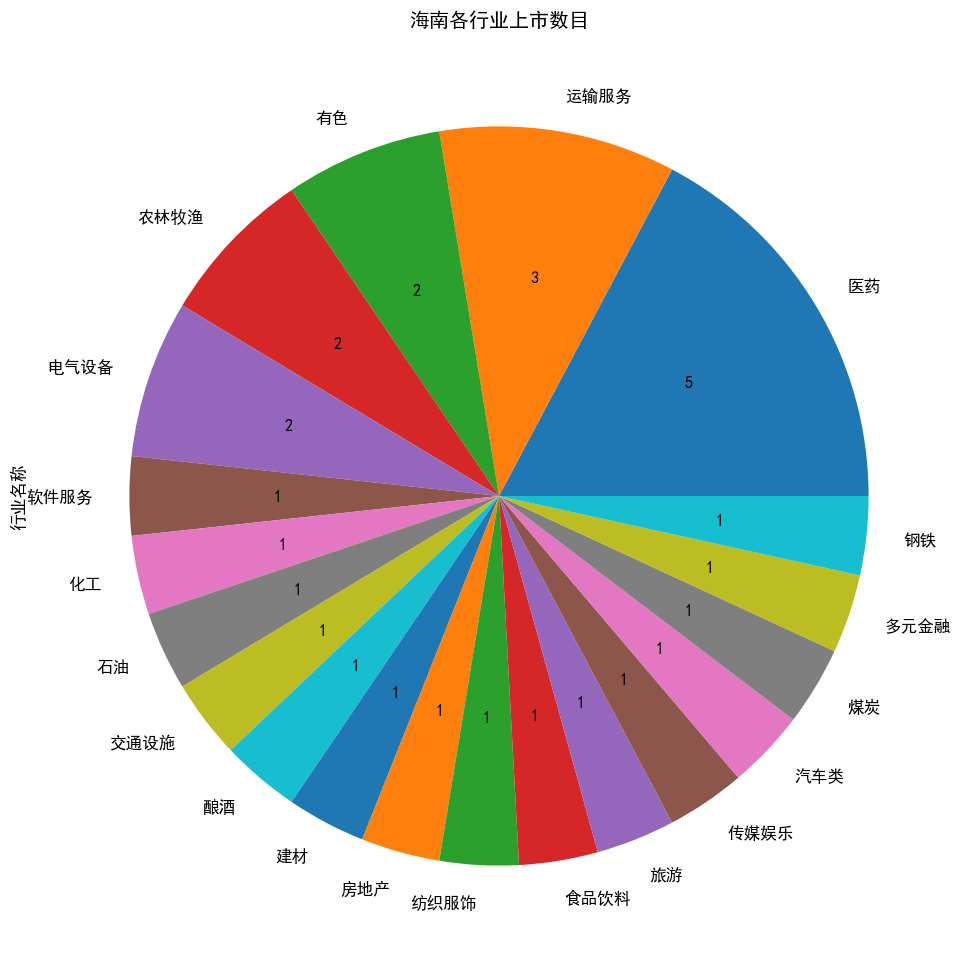

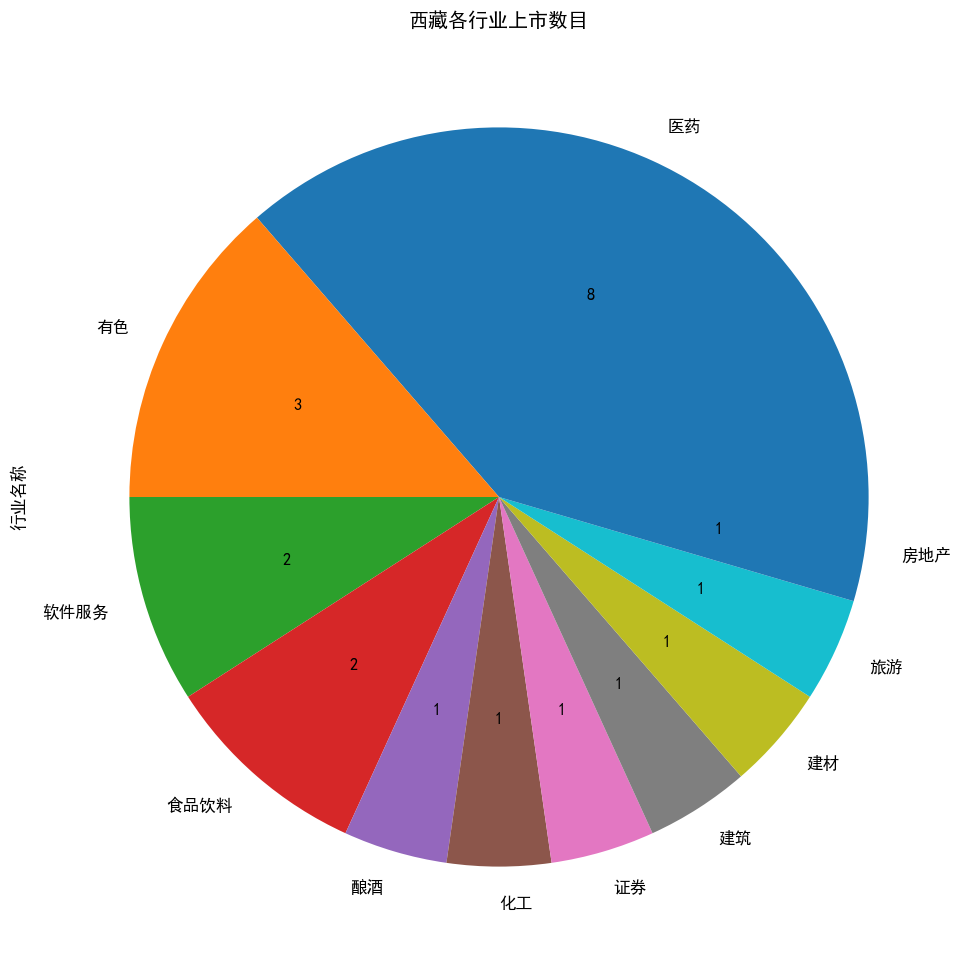

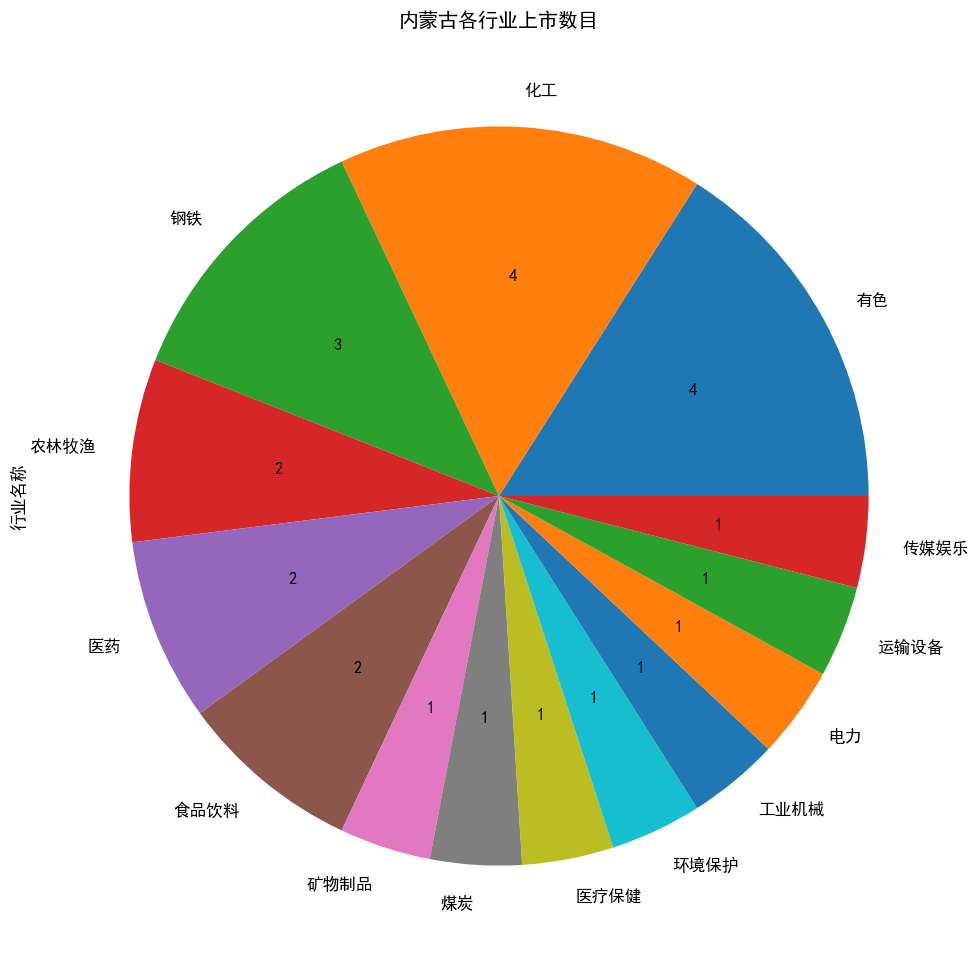

In [4]:
industry = pd.read_csv(
    "data/industry.txt",
    sep="\t",
    names=["industry_id", "industry_name", "stock_id", "stock_name"],
    dtype=str,
)
region_industry = pd.merge(region, industry, on="stock_id", how="inner")[["region_name", "industry_name"]]

for index, region_name in enumerate(region.region_name.unique()):
    industry_names = region_industry[region_industry.region_name == region_name].industry_name
    industry_count = industry_names.value_counts()
    industry_total = industry_count.sum()

    industry_count.plot(
        kind="pie",
        autopct=lambda x: "{:.0f}".format(industry_total * x / 100),
        figsize=(16, 12),
        title=f"{region_name}各行业上市数目",
        ylabel="行业名称",
    )
    plt.show()

